[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)

# Data Preparation

In [1]:
# Import Dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the CSV files. Make sure the files are available in your Google Drive

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [3]:
# Print the shape of the data

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


### Column Descriptions

- PassengerId = Passenger ID
- Survived: Survival (0 = No; 1 = Yes)
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name: Name
- sex: Sex
- Age: Age
- SibSp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- Ticket: Ticket Number
- Fare: Passenger Fare (British pound)
- Cabin: Cabin
- Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [4]:
# View the summary statistic of all columns including non-numeric columns

train.describe(include ='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# View the DataFrame

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Find the number of missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

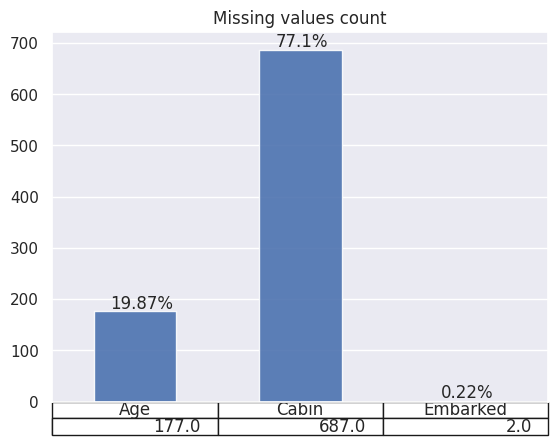

In [7]:
# Missing values

# number of rows
rows_length = train.shape[0]
# fields with missing value count
fields_with_nan_length = train.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [8]:
# Creating a function to fill missing values in Age with the help of Pclass

def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
        
        if Pclass == 3:
            return 24
        
        
    else:
        return Age

In [9]:
# Filling missing values
train['Age']= train[['Age', 'Pclass']].apply(fill_age, axis=1)
test['Age']= test[['Age', 'Pclass']].apply(fill_age, axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# Create a column that categorizes each passenger's family size

# train['Family_size'] = train['SibSp'] + train['Parch'] +1


# def Family_group(size) :
#     a = ''
#     if (size<=1):
#         a = 'Alone'
#     elif(size<=3):
#         a ='small'
#     elif(size<=5):
#         a ='medium'
#     else:
#         a='large'
#     return a
# train['Family_group'] = train['Family_size'].map(Family_group)
# train.head()




# test['Family_size'] = test['SibSp'] + test['Parch'] +1


# def Family_group(size) :
#     a = ''
#     if (size<=1):
#         a = 'Alone'
#     elif(size<=3):
#         a ='small'
#     elif(size<=5):
#         a ='medium'
#     else:
#         a='large'
#     return a
# test['Family_group'] = test['Family_size'].map(Family_group)
# test.head()

In [11]:
# Perform one-hot coding to represent categorical column as numerical column.
# drop_first = True: drop the first encoded column to avoid multicollinearity (a situation where two or more variables are highly correlated).

embarked_train = pd.get_dummies(train['Embarked'])
embarked_test = pd.get_dummies(test['Embarked'])
sex_train = pd.get_dummies(train['Sex'])
sex_test = pd.get_dummies(test['Sex'])
Pclass_train = pd.get_dummies(train['Pclass'])
Pclass_test = pd.get_dummies(test['Pclass'])

train = pd.concat([train,embarked_train, sex_train, Pclass_train], axis=1)
test = pd.concat([test,embarked_test, sex_test, Pclass_test], axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,1,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,1,1,0,0


In [12]:
# Drop unnecessary columns

train.drop(['Embarked','PassengerId','Name','Ticket','Cabin','Sex'],axis=1,inplace=True)
test.drop(['Embarked','PassengerId','Name','Ticket','Cabin','Sex'],axis=1,inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,3,24.0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [13]:
test

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,3,24.0,0,0,8.0500,0,0,1,0,1,0,0,1
